# Chapter 5: Equation solving

In [1]:
from scipy import linalg as la

In [2]:
from scipy import optimize

In [3]:
import sympy

In [4]:
sympy.init_printing()

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [7]:
from __future__ import division

## Linear Algebra - Linear Equation Systems

$$
2 x_1 + 3 x_2 = 4
$$

$$
5 x_1 + 4 x_2 = 3
$$

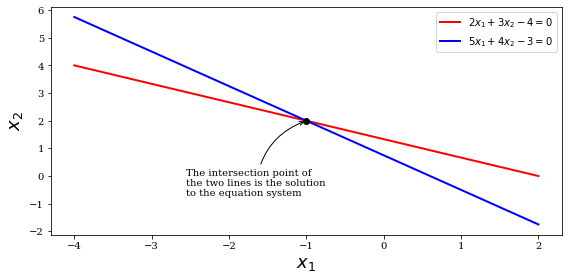

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend();

fig.tight_layout()
fig.savefig('ch5-linear-systems-simple.pdf')

### Symbolic approach

In [9]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [10]:
A.rank()

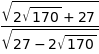

In [11]:
A.condition_number()

In [12]:
sympy.N(_)

In [13]:
A.norm()

In [14]:
L, U, _ = A.LUdecomposition()

In [15]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [16]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [17]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [18]:
x = A.solve(b)

In [19]:
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

### Numerical approach

In [20]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [21]:
np.linalg.matrix_rank(A)

2

In [22]:
np.linalg.cond(A)

In [23]:
np.linalg.norm(A)

In [24]:
P, L, U = la.lu(A)

In [25]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [26]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [27]:
L*U

array([[5. , 0. ],
       [0. , 1.4]])

In [28]:
la.solve(A, b)

array([-1.,  2.])

### Example : rank and condition numbers -> numerical errors

In [29]:
p = sympy.symbols("p", positive=True)

In [30]:
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])

In [31]:
b = sympy.Matrix([1, 2])

In [32]:
sympy.simplify(A.solve(b))

⎡2⋅p - 1⎤
⎢───────⎥
⎢ p - 1 ⎥
⎢       ⎥
⎢  -√p  ⎥
⎢ ───── ⎥
⎣ p - 1 ⎦

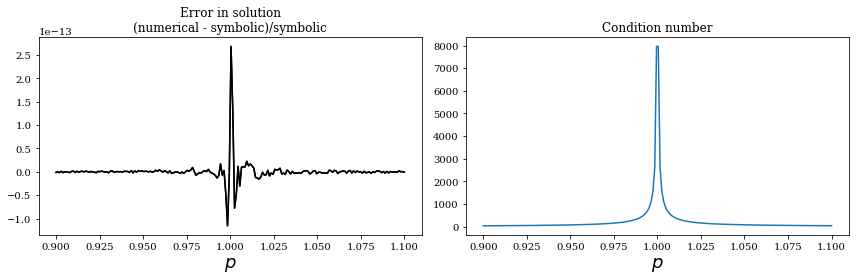

In [33]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()

# Function for solving numerically
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()
fig.savefig('ch5-linear-systems-condition-number.pdf')

### Rectangular systems

### Underdetermined

In [34]:
unknown = sympy.symbols("x, y, z")

In [35]:
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])

In [36]:
x = sympy.Matrix(unknown)

In [37]:
b = sympy.Matrix([7, 8])

In [38]:
AA = A * x - b

In [39]:
sympy.solve(A*x - b, unknown)

### Overdetermined: least squares

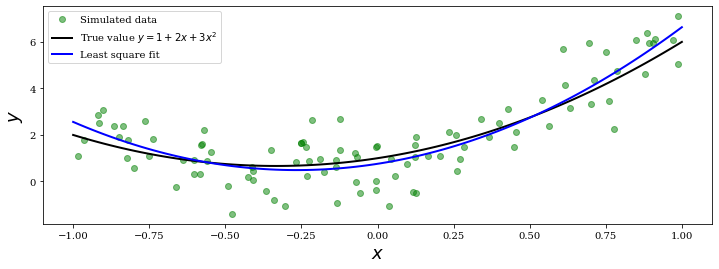

In [40]:
np.random.seed(1234)

# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data points
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square.pdf')

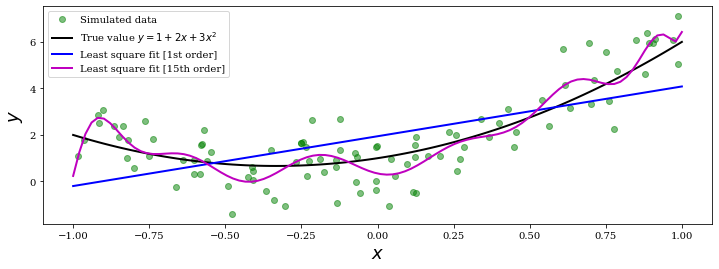

In [41]:
# fit the data to the model using linear least square: 
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square-2.pdf')

## Eigenvalue problems

In [42]:
eps, delta = sympy.symbols("epsilon, delta")

In [43]:
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

⎡ε  δ ⎤
⎢     ⎥
⎣δ  -ε⎦

In [44]:
eval1, eval2 = H.eigenvals()

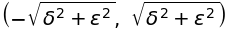

In [45]:
eval1, eval2

In [46]:
H.eigenvects()

⎡⎛                  ⎡⎡      -δ        ⎤⎤⎞  ⎛                 ⎡⎡      -δ       
⎢⎜    _________     ⎢⎢────────────────⎥⎥⎟  ⎜   _________     ⎢⎢───────────────
⎢⎜   ╱  2    2      ⎢⎢       _________⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢       ________
⎢⎜-╲╱  δ  + ε  , 1, ⎢⎢      ╱  2    2 ⎥⎥⎟, ⎜╲╱  δ  + ε  , 1, ⎢⎢      ╱  2    2
⎢⎜                  ⎢⎢ε + ╲╱  δ  + ε  ⎥⎥⎟  ⎜                 ⎢⎢ε - ╲╱  δ  + ε 
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

 ⎤⎤⎞⎤
─⎥⎥⎟⎥
_⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [47]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()

In [48]:
sympy.simplify(evec1[0].T * evec2[0])

[0]

In [49]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
A

array([[1, 3, 5],
       [3, 5, 3],
       [5, 3, 9]])

In [50]:
evals, evecs = la.eig(A)

In [51]:
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [52]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [53]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

## Nonlinear equations

### Univariate

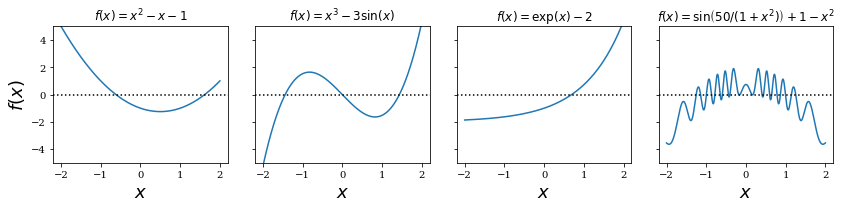

In [54]:
x = np.linspace(-2, 2, 1000)

# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)
    
fig.tight_layout()
fig.savefig('ch5-nonlinear-plot-equations.pdf')

### Symbolic

In [55]:
import sympy as s

In [56]:
x, a, b, c = sympy.symbols("x, a, b, c")

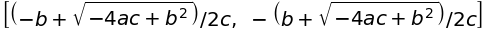

In [57]:
sympy.solve(a + b*x + c*x**2, x)

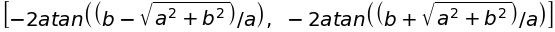

In [58]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

### Bisection method

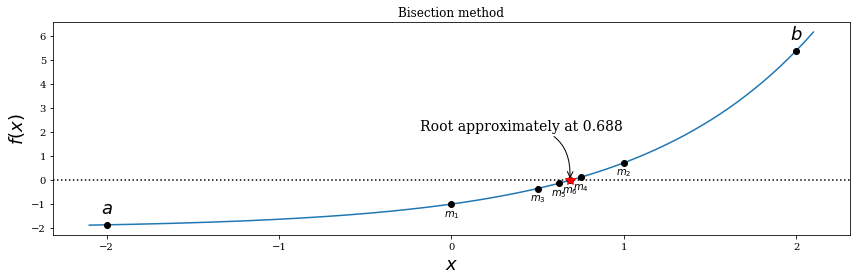

In [60]:
# define a function, desired tolerance and starting interval [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

fig.tight_layout()
fig.savefig('ch5-nonlinear-bisection.pdf')

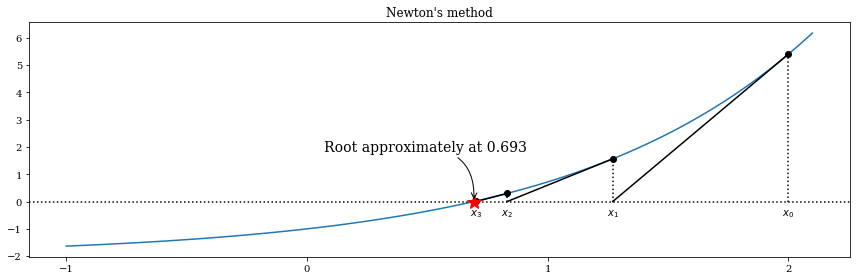

In [61]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([-1, 0, 1, 2])
fig.tight_layout()
fig.savefig('ch5-nonlinear-newton.pdf')

### `scipy.optimize` functions for root-finding

In [62]:
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

In [63]:
optimize.newton(lambda x: np.exp(x) - 2, 2)

In [64]:
x_root_guess = 2

In [65]:
f = lambda x: np.exp(x) - 2

In [66]:
fprime = lambda x: np.exp(x)

In [67]:
optimize.newton(f, x_root_guess)

In [68]:
optimize.newton(f, x_root_guess, fprime=fprime)

In [69]:
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

In [70]:
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

In [71]:
optimize.ridder(lambda x: np.exp(x) - 2, -2, 2)

### Multivariate

In [72]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

In [73]:
optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [74]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

In [75]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

In [76]:
#import sympy as s

In [77]:
x, y = sympy.symbols("x, y")

f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

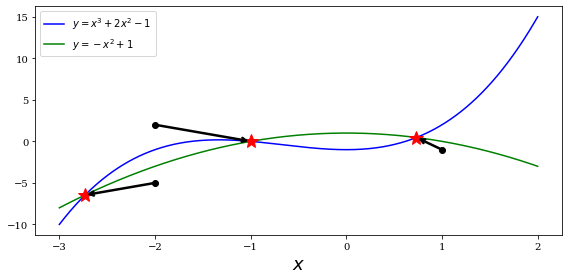

In [78]:
#def f(x):
#    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()
fig.savefig('ch5-nonlinear-system.pdf')

In [79]:
optimize.broyden2(f, x_guesses[1])

array([0.73205079, 0.46410162])

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


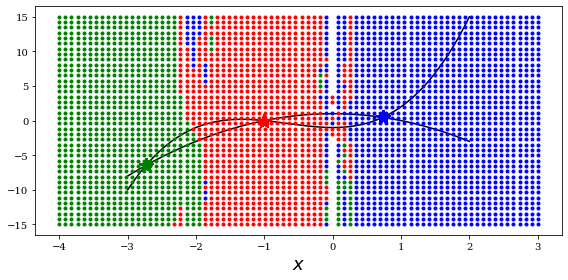

In [80]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,
            x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
    
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()
fig.savefig('ch5-nonlinear-system-map.pdf')

## Versions

In [81]:
%reload_ext version_information

In [82]:
%version_information sympy, scipy, numpy, matplotlib

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.6.1
OS Windows 10 10.0.18362 SP0
sympy 1.4
scipy 1.2.1
numpy 1.16.4
matplotlib 3.1.0
Sun Sep 27 12:25:22 2020 ?D1¨²¡À¨º¡Á?¨º¡À??